# Carbon Dioxide Emissions Prediction Model (Alternative Implementation)

In [292]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm


## Linear Regression Implementation using the Normal Equation
This class defines a linear regression model that utilizes the normal equation to compute the optimal weights and bias without iterative optimization. It does not require hyperparameters like learning rate or epochs, making it straightforward for simple datasets. The class includes two essential functions:

- `fit(X, Y)`: Takes the feature matrix `X` and the corresponding target values `Y` to train the model. It calculates the optimal weights and bias using the normal equation, ensuring efficient computation.

- `predict(X)`: Accepts a list of features and returns the model's predicted values based on the learned weights and bias.


In [293]:
# Implementing Linear regression using the normal equation

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, Y):
        
        X = np.array(X)
        Y = np.array(Y).reshape(-1, 1)

        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

        self.bias = theta[0, 0]
        self.weights = theta[1:]
    def predict(self, X):
   
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias


# Performance Metrics

In [294]:
def mean_absolute_error(real_values, predicted_values):
    total_error = 0
    n = len(real_values)  
    
    for i in range(n):
        total_error += abs(real_values[i] - predicted_values[i])  
    
    mean_error = total_error / n  
    return mean_error

def root_mean_squared_error(real_values, predicted_values):
    total_squared_error = 0
    n = len(real_values)  
    
    for i in range(n):
        total_squared_error += (real_values[i] - predicted_values[i]) ** 2  
    
    mean_squared_error = total_squared_error / n  
    return mean_squared_error ** 0.5  

def coefficient_of_determination(real_values, predicted_values):
    mean_real = sum(real_values) / len(real_values)  
    total_variance = 0
    explained_variance = 0
    n = len(real_values)  

    for i in range(n):
        total_variance += (real_values[i] - mean_real) ** 2  
        explained_variance += (real_values[i] - predicted_values[i]) ** 2  
    
    r_squared = 1 - (explained_variance / total_variance)  
    return r_squared


#### Loading and filtering the dataset

In [295]:
# Loading and processing data as in the raw implementation
data = pd.read_csv("./data/CO2_Emissions.csv")

In [296]:
#Selecting necessary columns and renaming columns with space in their names
columns = ['Make', 'Vehicle Class', 'Engine Size(L)', 'Transmission', 'CO2 Emissions(g/km)']
data = data[columns]
data.columns = [col.replace(' ', '_') for col in data.columns]
data.head()

,Make,Vehicle_Class,Engine_Size(L),Transmission,CO2_Emissions(g/km)
0,ACURA,COMPACT,2.0,AS5,196
1,ACURA,COMPACT,2.4,M6,221
2,ACURA,COMPACT,1.5,AV7,136
3,ACURA,SUV - SMALL,3.5,AS6,255
4,ACURA,SUV - SMALL,3.5,AS6,244


In [297]:

# Factorizing our categorical columns
categorical_columns = ['Make', 'Vehicle_Class', 'Transmission']
for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0] + 1

data.head()

,Make,Vehicle_Class,Engine_Size(L),Transmission,CO2_Emissions(g/km)
0,1,1,2.0,1,196
1,1,1,2.4,2,221
2,1,1,1.5,3,136
3,1,2,3.5,4,255
4,1,2,3.5,4,244


####  Dividing the dataset into  training, testing and validation sets using a 60-20-20 split 

In [298]:

# Splitting  the data for training testing and validation
data_x = data.drop(columns=['CO2_Emissions(g/km)']).values
data_y = data['CO2_Emissions(g/km)'].values

train_x, temp_x, train_y, temp_y = train_test_split(data_x, data_y, test_size=0.40, random_state=42)
validation_x, test_x, validation_y, test_y = train_test_split(temp_x, temp_y, test_size=0.50, random_state=42)


### Plotting the relationship between numerical features and target feature

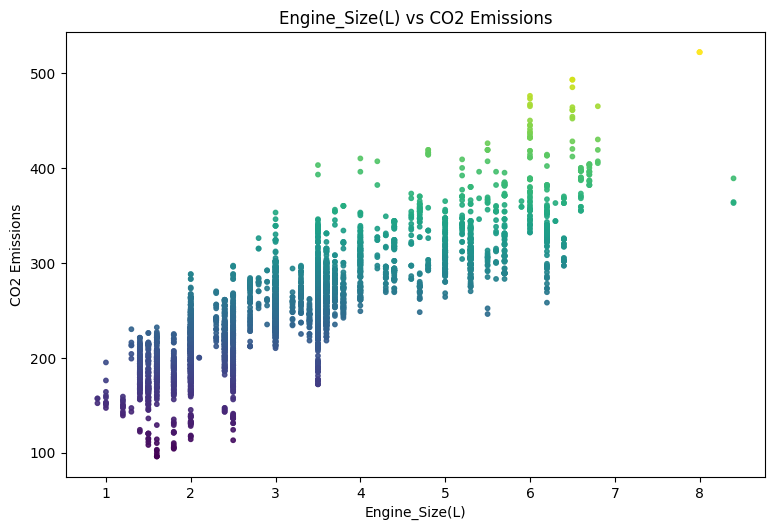

In [299]:
import matplotlib.pyplot as plt

# Plot numerical features
numerical_features = ['Engine_Size(L)']

plt.figure(figsize=(15, 10))  
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)  
    plt.scatter(train_x[:, 2], train_y, s=10, c=train_y, cmap="viridis", alpha=0.9) 
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel("CO2 Emissions")

plt.tight_layout() 
plt.show()


### Visualizing the relationship between categorical features and Target feature

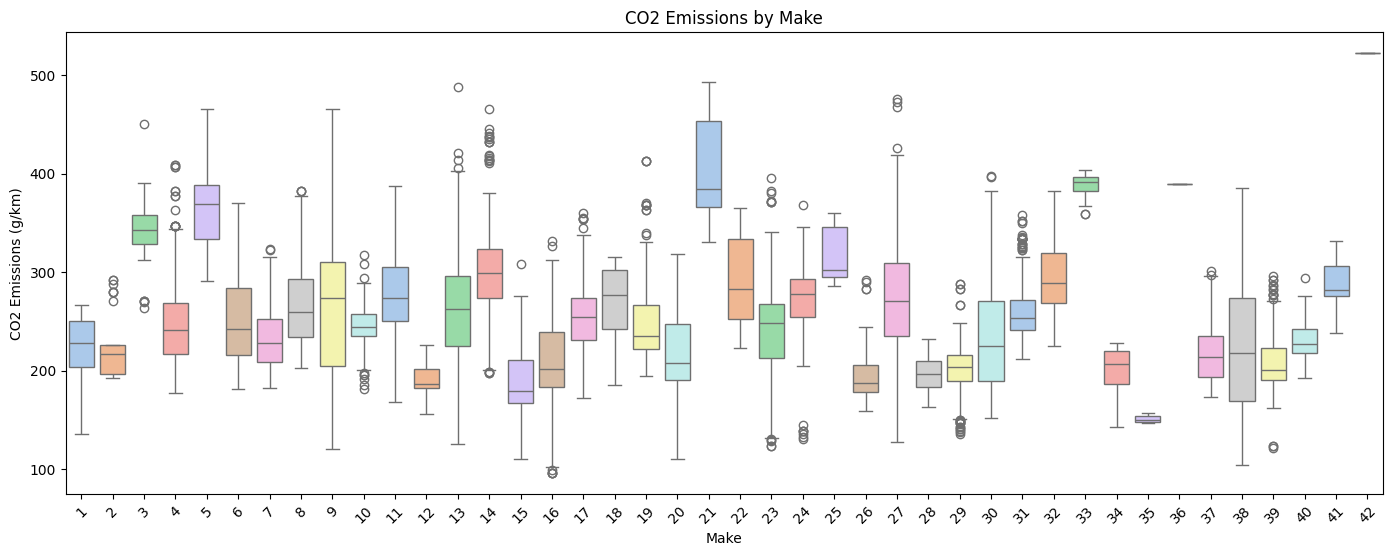

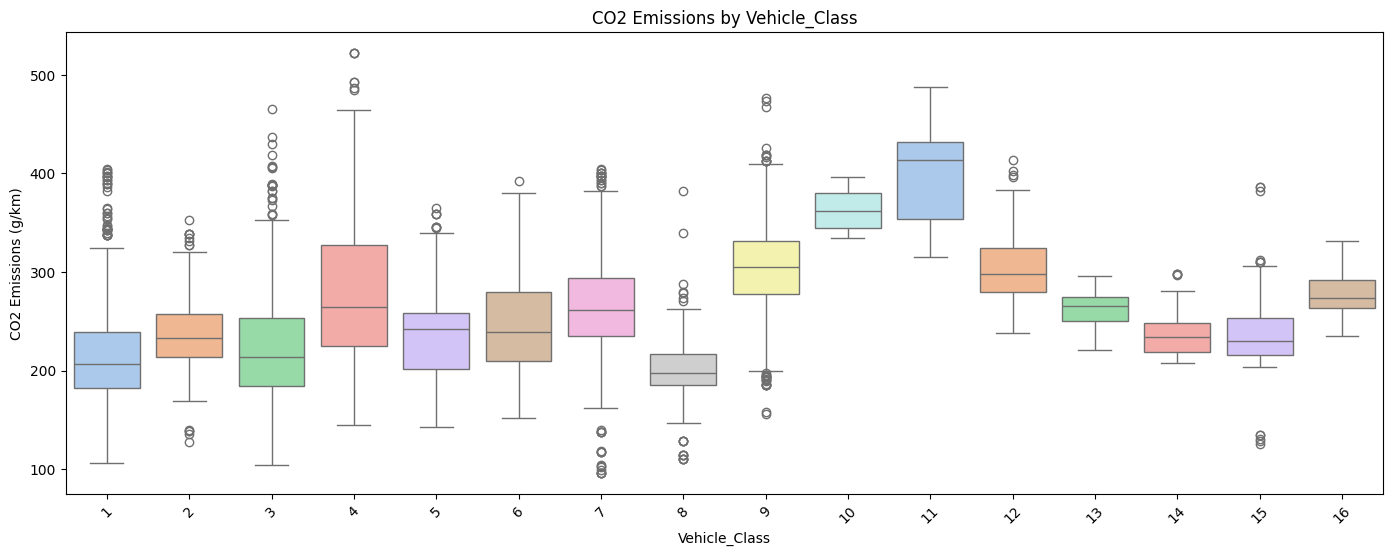

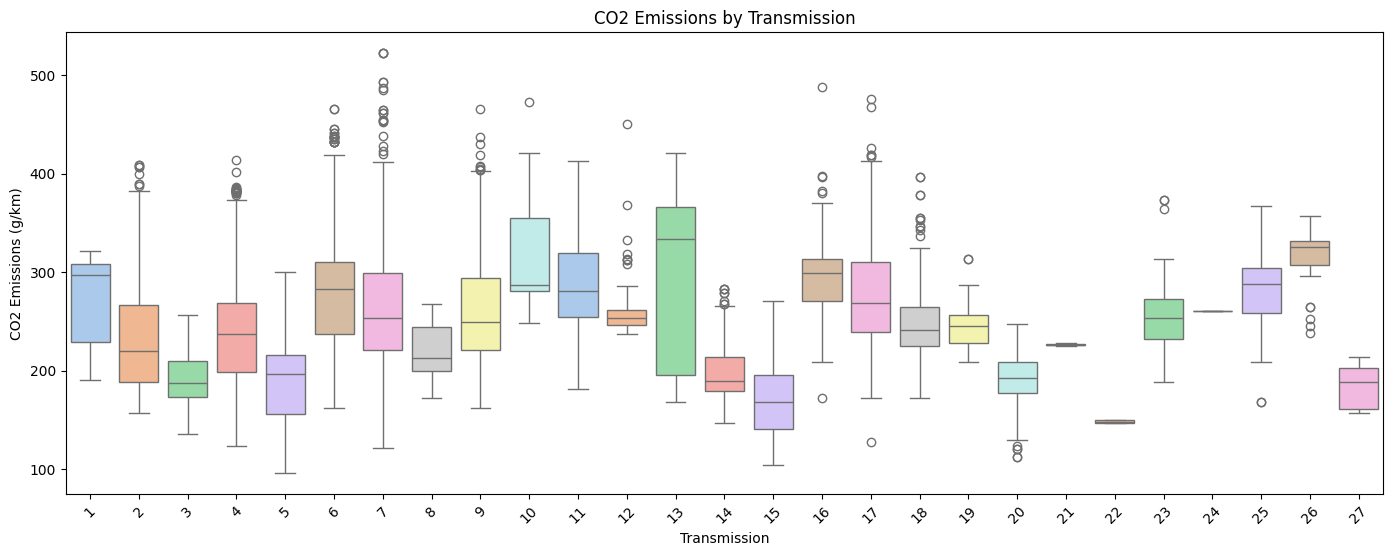

In [300]:
# Plotting categorical features
for i, feature in enumerate(categorical_columns):
    plt.figure(figsize=(17, 6))
    sns.boxplot(x=data[feature], y=data['CO2_Emissions(g/km)'], hue=data[feature], palette="pastel", legend=False)
    plt.title('CO2 Emissions by ' + feature)
    plt.xlabel(feature)
    plt.ylabel('CO2 Emissions (g/km)')
    plt.xticks(rotation=45)
    plt.show()


## Training The model 

In [ ]:

model = LinearRegression()

# Fitting our model on training data
model.fit(train_x, train_y)

# Validating the model
predictions = model.predict(validation_x)
rms_error = root_mean_squared_error(validation_y, predictions)

print(f"Model RMS Error on Validation Set: {rms_error}")

# Testing on the test set to evaluate performance
test_predictions = model.predict(test_x)
test_rms_error = root_mean_squared_error(test_y, test_predictions)
print(f"Model RMS Error on Test Set: {test_rms_error}")




Model RMS Error on Validation Set: [30.21611133]
Model RMS Error on Test Set: [30.11097757]


# Testing the Model

The testing data subset will be used along with the following performance metrics to evaluate the final version of the model:


In [302]:

model = LinearRegression()

# Fit model on training data
model.fit(train_x, train_y)

# Validate the model
predictions = model.predict(validation_x)

# Calculating evaluation metrics for the validation set
rms_error_validation = root_mean_squared_error(validation_y, predictions)
mae_validation = mean_absolute_error(validation_y, predictions)
r_squared_validation = coefficient_of_determination(validation_y, predictions)

print(f"Model RMS Error on Validation Set: {rms_error_validation}")
print(f"Model Mean Absolute Error on Validation Set: {mae_validation}")
print(f"Model R^2 on Validation Set: {r_squared_validation}")

# Test on the test set to evaluate performance
test_predictions = model.predict(test_x)

print("==================================================")

# Calculating evaluation metrics for the test set
test_rms_error = root_mean_squared_error(test_y, test_predictions)
test_mae = mean_absolute_error(test_y, test_predictions)
test_r_squared = coefficient_of_determination(test_y, test_predictions)

print(f"Model RMS Error on Test Set: {test_rms_error}")
print(f"Model Mean Absolute Error on Test Set: {test_mae}")
print(f"Model R^2 on Test Set: {test_r_squared}")


Model RMS Error on Validation Set: [30.21611133]
Model Mean Absolute Error on Validation Set: [23.12693181]
Model R^2 on Validation Set: [0.73183172]
Model RMS Error on Test Set: [30.11097757]
Model Mean Absolute Error on Test Set: [22.9308806]
Model R^2 on Test Set: [0.72732457]


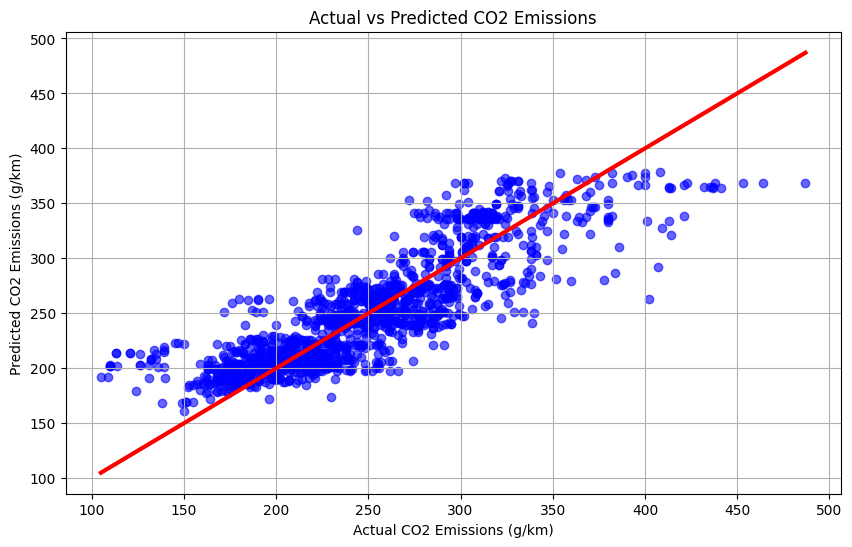

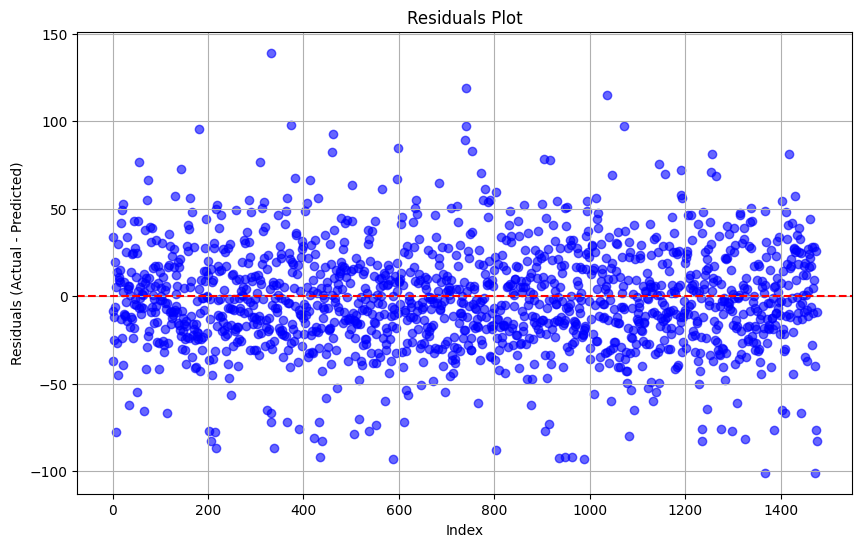

In [303]:

predictions = model.predict(test_x)

# Plotting predictions vs. actual values 
plt.figure(figsize=(10, 6))
plt.scatter(test_y, predictions, color='blue', alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], lw=3, color="red")  
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.title("Actual vs Predicted CO2 Emissions")
plt.grid()
plt.show()

# Residuals plot using predictions and test_y
residuals = test_y.flatten() - predictions.flatten()  
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.6)  
plt.axhline(y=0, color='red', linestyle='--')  
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid()
plt.show()


## Showing that the conditions for Linear Regression are met
The following are the conditions that determine whether linear regression is an appropriate model for a given problem:

- ***Linear relationship***: states that there should be a linear relationship between the dependent and independent variables. This shall be demonstrated for each of the features in our dataset.

- ***Homoscedasticity***: states that the variance of residuals should be consistent across all levels of the independent variables. This can also be demonstrated with the aforementioned graphs.

- ***No Multicollinearity***: states that independent variables must not be too highly correlated with each other.

- ***Normality of Errors***: states that the residuals (differences between observed and predicted values) should be normally distributed. This can be verified using a histogram or Q-Q plot of residuals.

- ***No Autocorrelation of Errors***: states that the residuals should not show patterns over time or across observations, ensuring they are independent of one another. This can be tested using the Durbin-Watson test.


1. Linearity

To check the linearity assumption, we will plot the predicted values against the actual values.

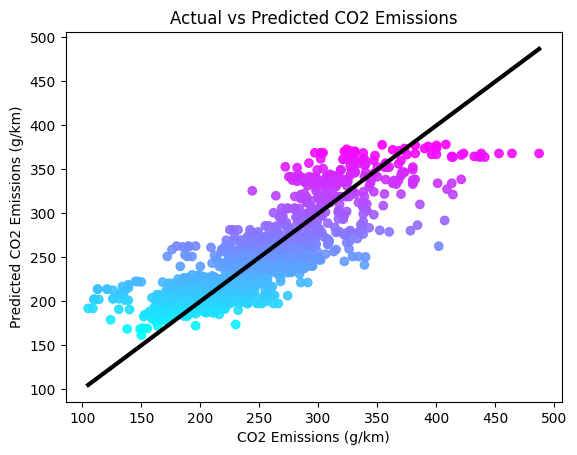

In [304]:
import matplotlib.pyplot as plt

predictions = model.predict(test_x)
value_range = [test_y.min(), test_y.max()]

# We Compare the predicted values and the actual values
plt.scatter(test_y, predictions, c=predictions, cmap="cool", alpha=0.9)
plt.plot(value_range, value_range, lw="3", color="black")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.title("Actual vs Predicted CO2 Emissions")
plt.show()


2. Homoscedasticity (Constant Variance of Errors)

We will use the Breusch-Pagan test to check for homoscedasticity. A high p-value (typically > 0.05) indicates that homoscedasticity holds.

In [305]:

model = sm.OLS(train_y, sm.add_constant(train_x)).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
p_value = bp_test[1]
print("Breusch-Pagan p-value:", p_value)


Breusch-Pagan p-value: 2.742366481029623e-33


3. No Multicollinearity

We will calculate the Variance Inflation Factor (VIF) for each predictor to quantify multicollinearity. A VIF below 5 (some use 10) typically indicates acceptable multicollinearity.

In [306]:

train_x = pd.DataFrame(train_x, columns=["Make", 'Vehicle Class', 'Engine Size(L)', 'Transmission'])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = train_x.columns
vif_data["VIF"] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]

print(vif_data)


          feature       VIF
0            Make  2.862573
1   Vehicle Class  3.263873
2  Engine Size(L)  4.870681
3    Transmission  2.992383


4. Normality of Errors


We will visualize the residuals using a histogram and a Q-Q plot to check for normality. As can be seen the data has a gaussian distribution and the Q-Q plot follows nearly a staright path proving the normality of errors

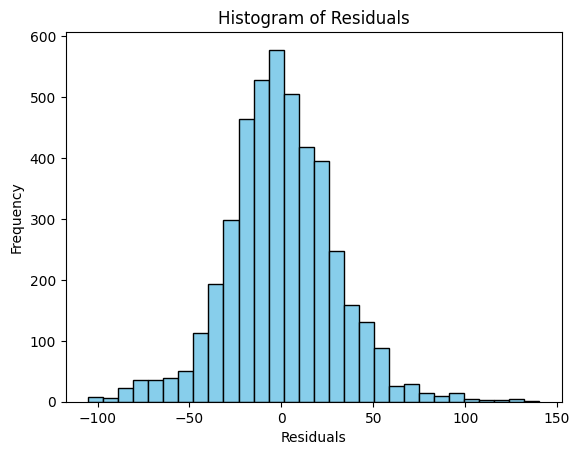

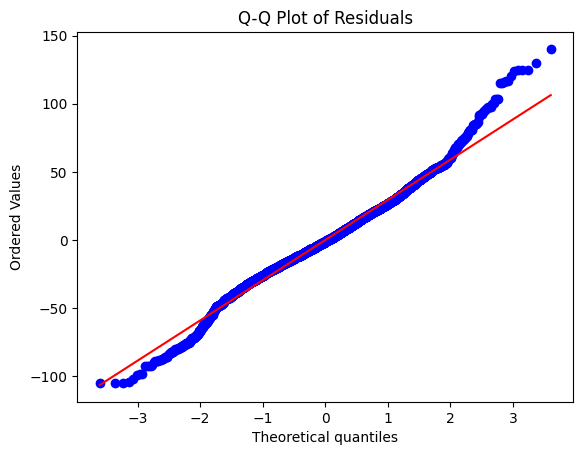

In [307]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = model.resid

# Histogram
plt.hist(residuals, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


5. No Autocorrelation of Errors

We will use the Durbin-Watson test to check for autocorrelation of errors. A value around 2 (typically between 1.7 and 2.3) indicates no autocorrelation.

In [308]:
dw_stat = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_stat)


Durbin-Watson statistic: 2.021535288261555
